How does the construct definition change based on whether targets are explicity included in the dataset or not.

- word clouds
- word shift graphs
- topic modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [2]:
sns.set_context('paper')

In [3]:
data = pd.read_excel('../data/Dehum Review.xlsx',
                     sheet_name='Sheet0', engine='openpyxl')

In [4]:
data.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'id', 'repeat check', 'name',
       'source', 'Title of the paper', 'Journal', 'author source',
       'Summary of the Paper', 'reaffirm', 'citations', 'Publication date',
       'Fill-in date', 'Accessibility', 'Filter question',
       'Construct definition', 'Sub-category', 'Sub-category_1_TEXT', 'Q32',
       'format of dataset', 'format of dataset_3_TEXT', 'how to access',
       'verification', 'reference of dataset', 'used datasets ', 'New dataset',
       'Data source', 'topical focus', 'Language', 'data collection',
       'data production', 'Country', 'Events', 'data procedure',
       'anonymity data', 'anonymity data_1_TEXT', 'Annotated type',
       'anno

In [5]:
data[['Identity-directed', 'Identity-directed_1_TEXT',
       'Affiliation-directed', 'Affiliation-directed_1_TEXT',
       'Person-directed', 'Person-directed_1_TEXT', 'about or to a person']]

Identity-directed  \
0    Identity-directed\nContent which contains a ne...   
1                                                   No   
2                                                   No   
3                                                  Yes   
4                                                  NaN   
..                                                 ...   
428                                                 No   
429                                                NaN   
430                                                NaN   
431                                                NaN   
432                                                NaN   

                              Identity-directed_1_TEXT  \
0    Identity-directed\nContent which contains a ne...   
1                                                  NaN   
2                                                  NaN   
3          these are often part of the displayed pairs   
4                                                  NaN   
..                                                 ...   
428                                                NaN   
429                                                NaN   
430                                                NaN   
431                                                NaN   
432                                                NaN   

                                  Affiliation-directed  \
0    Affiliation-directed\nContent which expresses ...   
1                                                   No   
2                                                   No   
3                                                  Yes   
4                                                  NaN   
..                                                 ...   
428                                                 No   
429                                                NaN   
430                                                NaN   
431                                                NaN   
432                                                NaN   

                           Affiliation-directed_1_TEXT  \
0    Affiliation-directed\nContent which expresses ...   
1                                                  NaN   
2                                                  NaN   
3          these are often part of the displayed pairs   
4                                                  NaN   
..                                                 ...   
428                                                NaN   
429                                                NaN   
430                                                NaN   
431                                                NaN   
432                                                NaN   

                                       Person-directed  \
0    Person-directed\nContent which directs negativ...   
1                                                   No   
2                                                   No   
3                                                   No   
4                                                  NaN   
..                                                 ...   
428                                                 No   
429                                                NaN   
430                                                NaN   
431                                                NaN   
432                                                NaN   

                                Person-directed_1_TEXT  \
0    Person-directed\nContent which directs negativ...   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
428                                                NaN   
429                                                NaN   
430                           

In [6]:
len(data)

433

In [7]:
data[['Construct definition', 'Sub-category', 'Sub-category_1_TEXT', 'General or specific']].isna().sum() / len(data)

Construct definition    0.295612
Sub-category            0.321016
Sub-category_1_TEXT     0.639723
General or specific     0.297921
dtype: float64

**Construct definition:** Indicate how does the paper define the topical focus? (e.g., sexism, racism, etc.) If the paper uses a quote from prior study, you can copy the content. Otherwise, it should be the original text the researchers have used in the paper to define the topical focus.


**Sub-category:** Indicate if a particular strategy has been introduced to distinguish the negative or positive class of the construct


**Sub-category:** Indicate if a particular strategy has been introduced to distinguish the negative or positive class of the construct? - Yes - Text

**General or specific:** If the paper studies content that expresses negativity in a general manner or against targets from a specific community.

In [8]:
data = data[1:]

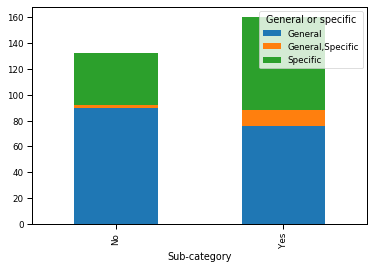

In [9]:
data.groupby(['Sub-category', 'General or specific']).size().unstack().plot(kind = 'bar', stacked = True)

In [10]:
# data = pd.read_csv('../data/DehumReview_1.csv')
filename = 'DehumReview_1.csv'
# filename = 'DehumReview_indira_language.csv'
data = pd.read_csv('../data/%s' %filename, encoding = "ISO-8859-1")

data.head()

Unnamed: 0   id repeat check                                  reference  \
0           0    1           No                      (Aldera et al., 2021)   
1           1    7           No                     (Han & Tsvetkov, 2020)   
2           2    9           No  (Al-Khalifa, Aljarah, & Abushariah, 2020)   
3           4   90           No                     (Mulki & Ghanem, 2021)   
4          17  100           No                      (Vidgen et al., 2020)   

                                  Title of the paper  \
0  Exploratory Data Analysis and Classification o...   
1  Fortifying Toxic Speech Detectors Against Veil...   
2        Hate Speech Classification in Arabic Tweets   
3  Let-Mi: An Arabic Levantine Twitter Dataset fo...   
4  Learning from the Worst: Dynamically Generated...   

                                             Journal Researcher location  \
0                                        IEEE Access        Saudi Arabia   
1                                     arXiv preprint                 USA   
2  Journal of Theoretical and Applied Information...              Jordan   
3  Proceedings of the Sixth Arabic Natural Langua...      Turkey, Canada   
4                    arXiv preprint arXiv:2012.15761                  UK   

                                Summary of the Paper reaffirm  citations  ...  \
0  In this paper, the authors present a dataset c...      Yes          1  ...   
1  In this work, they propose a framework aimed a...      Yes         40  ...   
2  This paper aims to present the work for detect...      Yes          3  ...   
3  In this paper, the authors introduce an Arabic...      Yes         20  ...   
4  This study presents a human-and-model-in-the-l...      Yes         53  ...   

  Identity-directed                           Identity-directed_1_TEXT  \
0               Yes                     Extremism, Religion, Political   
1                No                                                ã   
2                No                                                ã   
3               Yes                                             Gender   
4               Yes  Disability, Gender, Immigration status, Race /...   

    Identity-directed_summary Affiliation-directed  \
0  religion. Political, other                   No   
1                         NaN                   No   
2                         NaN                   No   
3                      gender                  Yes   
4        disability, gender,                   Yes   

                         Affiliation-directed_1_TEXT Person-directed  \
0                                                NaN              No   
1                                                NaN              No   
2                                                NaN              No   
3                                              Women             Yes   
4  People with disabilities; Gender minorities (e...              No   

                              Person-directed_1_TEXT about or to a person  \
0                                                NaN                  NaN   
1                                                ã                  ã   
2                                                ã                  ã   
3  7 Lebanese female journalists who covered the ...          To a person   
4                                                NaN                  NaN   

  counter speech Content producer  
0             No            Human  
1             No            Human  
2             No            Human  
3             No            Human  
4             No            Human  

[5 rows x 60 columns]

In [11]:
data.columns

Index(['Unnamed: 0', 'id', 'repeat check', 'reference', 'Title of the paper',
       'Journal', 'Researcher location', 'Summary of the Paper', 'reaffirm',
       'citations', 'Publication date', 'Fill-in date', 'Accessibility',
       'Filter dataset', 'Construct definition', 'Sub-category',
       'Sub-category_1_TEXT', 'availability of data', 'format of dataset',
       'format of dataset_3_TEXT', 'how to access',
       'verification of the way to access', 'reference of dataset',
       'Number of datasets in use', 'Number of new datasets', 'Data source',
       'topical focus', 'Language', 'Time span of data collection',
       'data production', 'Country/ region span', 'Events',
       'Data collection procedure\n', 'anonymity of data',
       'anonymity data_1_TEXT', 'Annotated type', 'annotation schema',
       'schema', 'Sampling available', 'sampling strategy',
       'annotation number', 'train', 'test', 'Annotators', 'guideline1',
       'Guidelines', 'Incentives 1', 'Incent

/home/indira/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/indira/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/indira/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/indira/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)


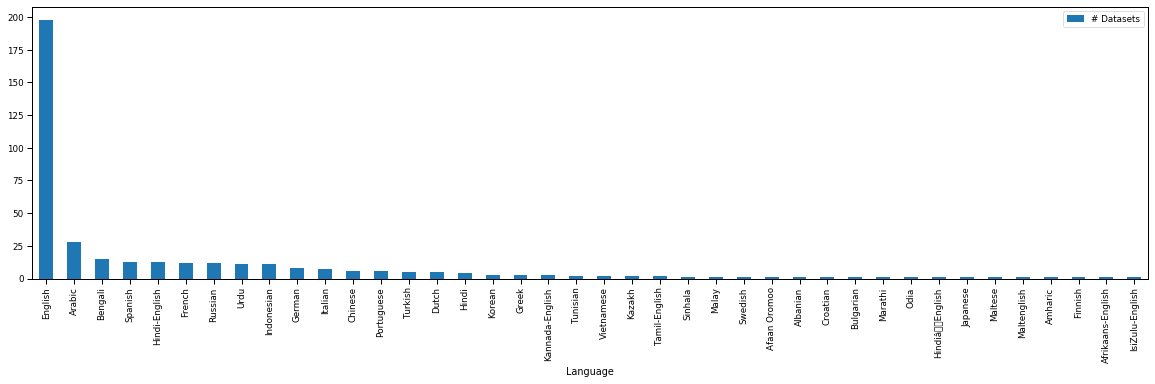

In [12]:
languages = data['Language'].str.split(', ').values
language_list = [item for sublist in languages for item in sublist]
languages_df = pd.DataFrame(Counter(language_list).most_common(40))
languages_df.columns = ['Language', '# Datasets']
languages_df = languages_df.set_index('Language')

fig, ax = plt.subplots(figsize = (20, 5))
languages_df.plot(kind = 'bar', ax = ax)

In [13]:
languages_df.head(15)

# Datasets
Language                 
English               198
Arabic                 28
Bengali                15
Spanish                13
Hindi-English          13
French                 12
Russian                12
Urdu                   11
Indonesian             11
German                  8
Italian                 7
Chinese                 6
Portuguese              6
Turkish                 5
Dutch                   5

In [14]:
top_languages = ['English',
 'Arabic',
 'Russian',
 'French',
 'Spanish',
 'German',
 'Italian',
 'Chinese',
 'Hindi',
 'Portuguese']
top_languages = [i[0] for i in languages_df.reset_index('Language').values][:15]
top_languages

['English',
 'Arabic',
 'Bengali',
 'Spanish',
 'Hindi-English',
 'French',
 'Russian',
 'Urdu',
 'Indonesian',
 'German',
 'Italian',
 'Chinese',
 'Portuguese',
 'Turkish',
 'Dutch']

In [15]:
data_ = data[data['General or specific'] == 'Specific']
data_ = data_[data_['topical focus'] == 'Hate Speech']
data_['Construct definition'].values

array(['"Although there is no universal deï¬\x81nition for hate speech, the most accepted deï¬\x81nition is provided by Nockleby (2000): â\x80\x9cany communication that disparages a target group of people based on some characteristic such as race, colour, ethnicity, gender, sexual orientation, nationality, religion, or other characteristicâ\x80\x9d."',
       'hate speech',
       'In the specific setting of college campuses, we adopt Kaplinâ\x80\x99s definition as a way to operationalize hateful speech in the online college communities: ..verbal and written words, and symbolic acts, that convey a grossly negative assessment of particular persons or groups based on their race, gender, ethnicity, religion, sexual orientation, or disability, which is not limited to a face-to-face confrontation or shouts from a crowd, but may also appear on T-shirts, on posters, on classroom blackboards, on student bulletin boards, in flyers and leaflets, in phone calls, etc.',
       'For the purposes of

In [16]:
langs = data.groupby('Language').size().sort_values(ascending = False).head(15).keys()

In [17]:
for lang in langs: # change this to top languages
    data_ = data[data['Language'] == lang].sample(2)
    print(lang, data_['General or specific'].values[0], data_['Construct definition'].values[0])
    print(lang, data_['General or specific'].values[1], data_['Construct definition'].values[1])
    print('\n\n')

English General biases of both explicit stereotypes and implicit stereotypes; Â explicit stereotypes are overtly expressed judgments, and reflect what people deliberately think about; implicit stereotypes, on the other hand, reflect more unconscious associations between a social group and certain attributes.
English General "Videos on YouTube carry different content, which may contain many unwanted things such as violence. Violence is the cause of many problems, especially among children like aggression and bullying at home, in school and in public places."



Arabic General "In (Nockleby, 2000), hate speech (HS) is formally deï¬ned as âany communication that disparages a person or a group on the basis of some characteristic such as race, color, ethnicity, gender, sexual orientation, nationality, religion, or other characteristicâ." 
Arabic General offensive language



Bengali General abusive text
Bengali General,Specific Vulgarity or obscenity indicates the use of curse, swear o

In [18]:
for lang in langs:
    data_ = data[data['topical focus'].isin(['Hate Speech', 'Hate speech'])]#.sample(2)
    data_ = data[data['Language'] == lang].sample(2)
    print(lang, data_['General or specific'].values[0], data_['Construct definition'].values[0])
    print(lang, data_['General or specific'].values[1], data_['Construct definition'].values[1])
    print('\n\n')

English General "Hate speech on social media is a common issue seen at present which is growing really fast. Due to the growth of online hate content thereâs a huge influence for the increase of hate crimes in the society. So, if an accurate efficient methodology can be found to control the online hate content, it will be a great relief to the society. This research represents a study carried out to compare different techniques for the task of hate speech identification of a local English dataset. "
English General Hate speech.



Arabic Specific â¦hate speechâ¦can be recognized when stereotyping group of people together or individuals by using racial and sexist slurs with intent to harm. In addition, indecently speaking about religion or specific country.
Arabic General Offensive language. "Offensiveness is often associated with undesirable behaviors such as trolling, cyberbullying, online extremism, political polarization, and propaganda."



Bengali General,Specific Vulgarity or

In [19]:
data.groupby(['topical focus', 'Language']).size().unstack()['Arabic'].sort_values(ascending = False).head(10)

topical focus
Hate Speech                      6.0
Offensiveness                    5.0
Hate speech                      2.0
Cyberbullying                    2.0
religious Hate Speech            1.0
Religious hate speech            1.0
Racism                           1.0
Political Trolling               1.0
Offensiveness and Hate Speech    1.0
Misogyny                         1.0
Name: Arabic, dtype: float64

(15.0, 0.0)

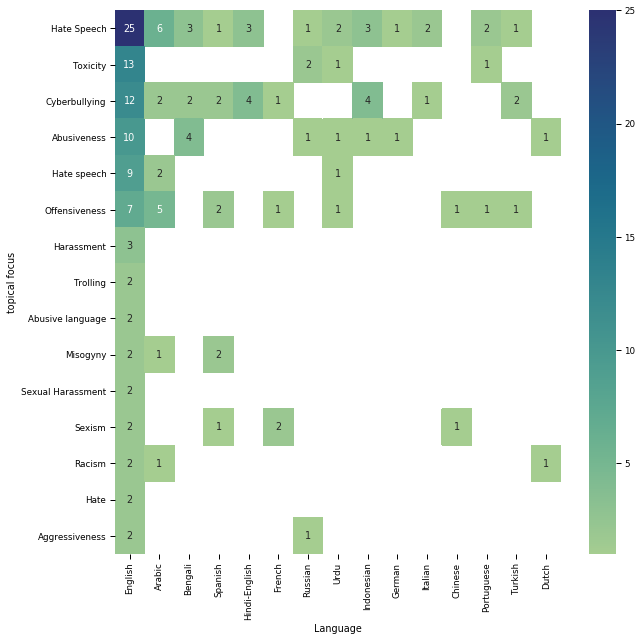

In [20]:
fig, ax = plt.subplots(figsize = (10, 10))
data_slice = data.groupby(['topical focus', 'Language']).size().unstack()[top_languages].sort_values('English', ascending = False).head(15)#.fillna(0)

ax = sns.heatmap(data_slice[top_languages],
            annot=True, cmap = 'crest')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [21]:
# ! pip install shifterator
import shifterator as sh

In [22]:
# with_target = data[data['neutral'] == 'Yes']['Construct definition']
# without_target = data[data['neutral'] == 'No']['Construct definition']

with_target = data[data['General or specific'] == 'Specific']['Construct definition']
without_target = data[data['General or specific'] == 'General']['Construct definition']

In [23]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

cachedStopWords = stopwords.words("english")

sentence='''This is my sentence'''
tokens = nltk.tokenize.word_tokenize(sentence)
fdist=FreqDist([token for token in tokens if token not in cachedStopWords])

In [24]:
cachedStopWords.extend(['“', '”', '‘', '’', '...'])

In [25]:
data__ = '"Sentiment analysis and offensive language identiﬁcation are related and has common aspects between them. Having the model to learn both tasks would be advantages to utilise some cues from one task to improve the other."'
data__.translate(str.maketrans('', '', string.punctuation))

'Sentiment analysis and offensive language identiﬁcation are related and has common aspects between them Having the model to learn both tasks would be advantages to utilise some cues from one task to improve the other'

In [26]:
tokens = []

for sent in with_target:
    sent_ = sent.translate(str.maketrans('', '', string.punctuation))
    tokens.extend(nltk.tokenize.word_tokenize(sent_.lower()))
fdist_with = FreqDist([token for token in tokens if token not in cachedStopWords])

tokens = []
for sent in without_target:
    sent_ = sent.translate(str.maketrans('', '', string.punctuation))
    tokens.extend(nltk.tokenize.word_tokenize(sent_.lower()))

fdist_without = FreqDist([token for token in tokens if token not in cachedStopWords])

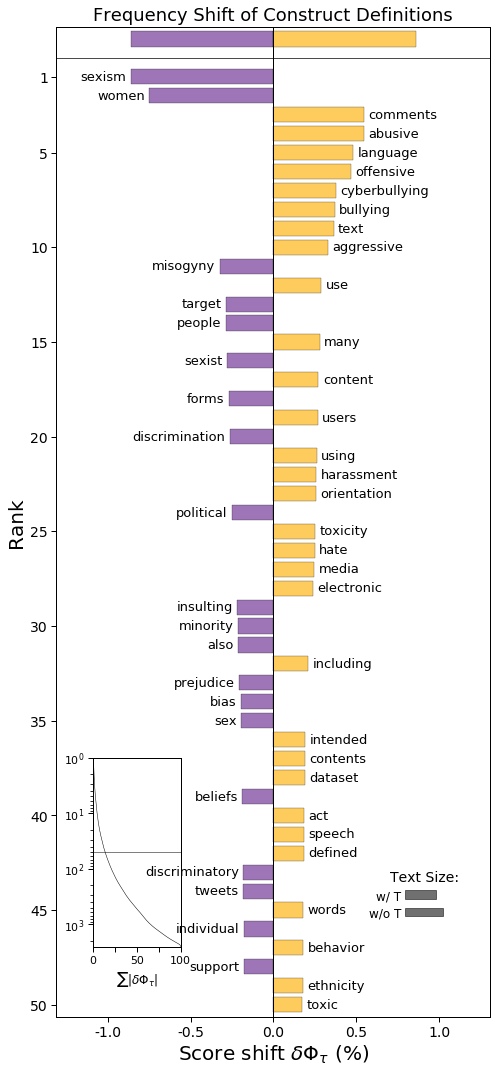

In [27]:
proportion_shift = sh.ProportionShift(type2freq_1=fdist_with,
                                      type2freq_2=fdist_without)
proportion_shift.get_shift_graph(system_names = ['w/ T', 'w/o T'],
                                 title='Frequency Shift of Construct Definitions')

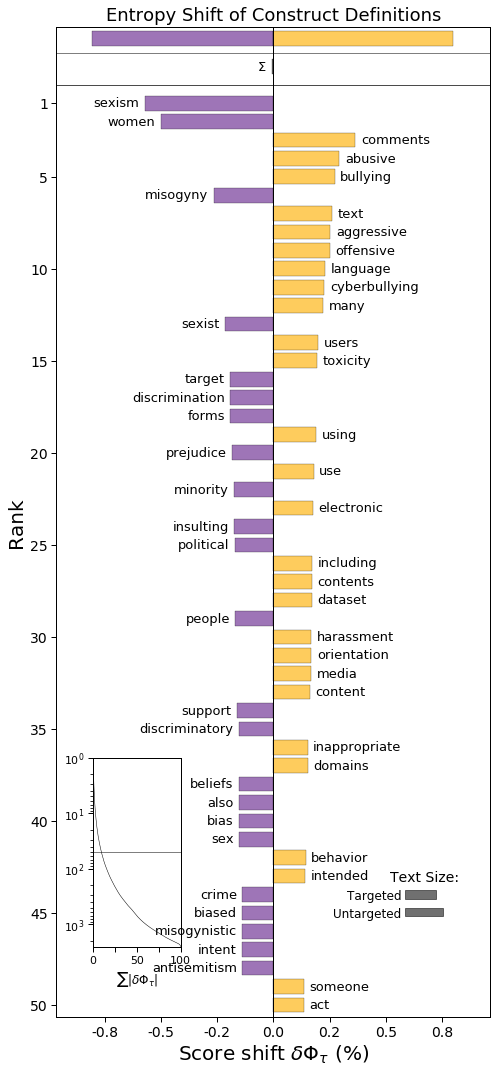

In [28]:
entropy_shift = sh.EntropyShift(type2freq_1=fdist_with,
                                      type2freq_2=fdist_without,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['Targeted', 'Untargeted'],
                                 title='Entropy Shift of Construct Definitions')

In [29]:
# ! pip install wordcloud

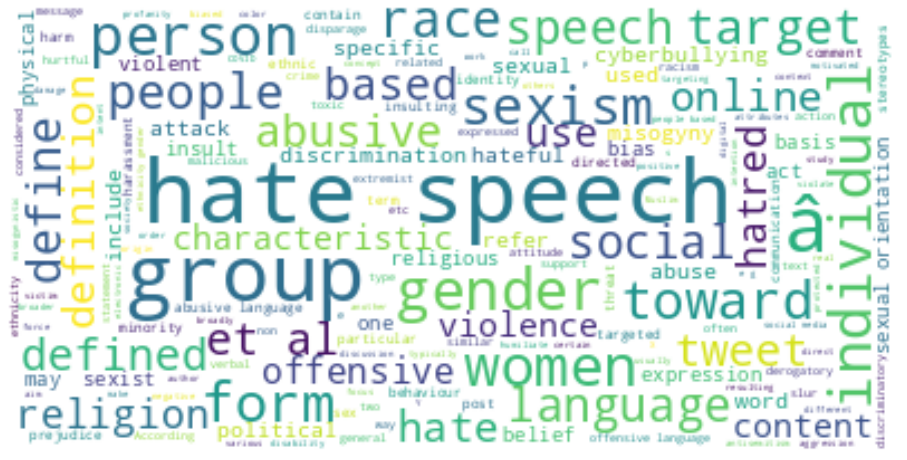

In [30]:
from wordcloud import WordCloud

def get_wordcloud(text, name = 'with_target'):
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40, background_color="white").generate(text)
    plt.figure(figsize = (16,9))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    # plt.savefig('../results/%s_wc.pdf' %name)
    # with open('../results/%s_wc.svg' %name, "w") as text_file:
    #     text_file.write(wordcloud.to_svg())
    # plt.show()
    return wordcloud

get_wordcloud(' '.join(with_target.values), name = 'with_target')

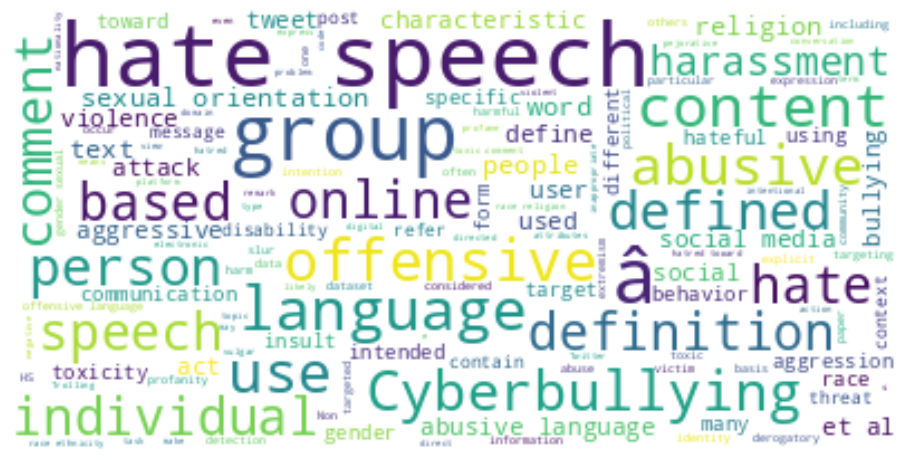

In [31]:
get_wordcloud(' '.join(without_target.values), name = 'without_target')

In [32]:
# for lang in langs:
#     lang_data = data[data['Language'] == lang]['Construct definition']
#     print(lang)
#     get_wordcloud(' '.join(lang_data.values), name = lang)

In [33]:
# ! pip install tomotopy

In [34]:
import tomotopy as tp
mdl = tp.LDAModel(k=20)

# all_tokens = []
words = []

for sent in with_target:
    sent_ = sent.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.tokenize.word_tokenize(sent_.lower())
    tokens = [token for token in tokens if token not in cachedStopWords]
    mdl.add_doc(tokens)

for i in range(0, 100, 10):
    mdl.train(10)
    # print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

for k in range(mdl.k):
    print('Top 10 words of topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=10))
    l = [[i[0], '%0.3f' %i[1]] for i in mdl.get_topic_words(k, top_n=10)]
    words.append([item for sublist in l for item in sublist])

# mdl.summary()

Top 10 words of topic #0
[('cyberbullying', 0.07855869084596634), ('online', 0.0714234784245491), ('victim', 0.04288262873888016), ('people', 0.04288262873888016), ('frames', 0.028612203896045685), ('damage', 0.028612203896045685), ('asian', 0.0214769896119833), ('various', 0.0214769896119833), ('real', 0.0214769896119833), ('regarding', 0.014341777190566063)]
Top 10 words of topic #1
[('speech', 0.19556191563606262), ('hate', 0.18018236756324768), ('offensive', 0.048357684165239334), ('person', 0.046160608530044556), ('language', 0.04396352916955948), ('people', 0.03517521917819977), ('content', 0.030781062319874763), ('insulting', 0.019795672968029976), ('towards', 0.017598595470190048), ('attacks', 0.017598595470190048)]
Top 10 words of topic #2
[('forms', 0.0897214263677597), ('ethnic', 0.05129683390259743), ('physical', 0.05129683390259743), ('include', 0.03208453580737114), ('addressed', 0.025680437684059143), ('negative', 0.025680437684059143), ('etc', 0.025680437684059143), ('b

In [35]:
pd.DataFrame(words).to_csv('../results/with_targets_tm.csv', sep = '\t')
pd.DataFrame(words)

0      1            2      3           4      5          6   \
0   cyberbullying  0.079       online  0.071      victim  0.043     people   
1          speech  0.196         hate  0.180   offensive  0.048     person   
2           forms  0.090       ethnic  0.051    physical  0.051    include   
3            2018  0.056        abuse  0.050  harassment  0.050     verbal   
4        misogyny  0.075       sexual  0.054   behaviour  0.041      women   
5       religious  0.055       hatred  0.055         may  0.045     toward   
6       extremist  0.070        force  0.040   instances  0.030       type   
7      definition  0.079         also  0.063      groups  0.058     define   
8          social  0.049     directed  0.043      online  0.032     racial   
9          sexism  0.130        women  0.091      sexist  0.048  prejudice   
10     individual  0.078     language  0.069       group  0.057    abusive   
11      intention  0.035   nontextual  0.028      spread  0.021      whose   
12         gender  0.105        based  0.079        race  0.072     target   
13        violent  0.071      support  0.043        work  0.036       post   
14             et  0.082           al  0.077     insults  0.041        one   
15           bias  0.057  stereotypes  0.051      biased  0.032   violence   
16      political  0.105         harm  0.042        news  0.021       take   
17          group  0.099     religion  0.079      sexual  0.059    hateful   
18         social  0.091        media  0.043         use  0.031   messages   
19       minority  0.065        tweet  0.056           3  0.048          2   

       7          8      9               10     11              12     13  \
0   0.043     frames  0.029          damage  0.029           asian  0.021   
1   0.046   language  0.044          people  0.035         content  0.031   
2   0.032  addressed  0.026        negative  0.026             etc  0.026   
3   0.037     refers  0.031      aggression  0.031            2016  0.031   
4   0.041         ie  0.034         defines  0.034       according  0.027   
5   0.035    beliefs  0.030        includes  0.030  discrimination  0.030   
6   0.030   violence  0.030          notion  0.030       antiislam  0.030   
7   0.042  malicious  0.032          attack  0.032           terms  0.021   
8   0.022    context  0.022            term  0.022     deï¬nition  0.022   
9   0.030        sex  0.030  discrimination  0.030           basis  0.026   
10  0.053     tweets  0.041           words  0.041         hurtful  0.029   
11  0.021  contained  0.021     information  0.021        positive  0.021   
12  0.054    defined  0.054       ethnicity  0.033        identity  0.029   
13  0.021    defined  0.021        contempt  0.021         twitter  0.021   
14  0.036   targeted  0.036            2017  0.032            form  0.027   
15  0.032    similar  0.032       detection  0.026      minorities  0.026   
16  0.021      least  0.021      behaviours  0.021             aim  0.021   
17  0.051   specific  0.051     orientation  0.036      particular  0.028   
18  0.031     others  0.031          intent  0.031          racism  0.024   
19  0.048          1  0.040               x  0.032             two  0.032   

                14     15            16     17            18     19  
0          various  0.021          real  0.021     regarding  0.014  
1        insulting  0.020       towards  0.018       attacks  0.018  
2          broader  0.026       covid19  0.019     incidents  0.019  
3              act  0.025         crime  0.025        result  0.019  
4        typically  0.027    dictionary  0.027       related  0.020  
5      expressions  0.030  antisemitism  0.025         basis  0.025  
6            islam  0.030         sunni  0.030  islamophobia  0.030  
7            study  0.021         adopt  0.016    considered  0.016  
8         accepted  0.016     expresses  0.016         world  0.016  
9          hostile  0.026       towards  0.022     differe

In [36]:
mdl = tp.LDAModel(k=20)

# all_tokens = []
words = []

for sent in without_target:
    sent_ = sent.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.tokenize.word_tokenize(sent_.lower())
    tokens = [token for token in tokens if token not in cachedStopWords]
    mdl.add_doc(tokens)

for i in range(0, 100, 10):
    mdl.train(10)

for k in range(mdl.k):
    # print('Top 10 words of topic #{}'.format(k))
    # print(mdl.get_topic_words(k, top_n=10))
    l = [[i[0], '%0.3f' %i[1]] for i in mdl.get_topic_words(k, top_n=10)]
    words.append([item for sublist in l for item in sublist])
    

# mdl.summary()

In [37]:
pd.DataFrame(words).to_csv('../results/without_targets_tm.csv', sep = '\t')
pd.DataFrame(words)

0      1           2      3            4      5           6   \
0           often  0.040  particular  0.027      towards  0.027     broadly   
1        ideology  0.026   hostility  0.026    hatebased  0.026      social   
2      harassment  0.094        many  0.045    including  0.045    bullying   
3        comments  0.153        rude  0.033         even  0.027     hurtful   
4              al  0.122          et  0.116      harmful  0.031           p   
5        language  0.195     abusive  0.147         text  0.045  individual   
6       detection  0.044     domains  0.034     explicit  0.034     profane   
7       different  0.052         one  0.042       common  0.021     actions   
8             act  0.061   offensive  0.050   aggressive  0.044  expression   
9        violence  0.055      groups  0.039  individuals  0.032     attacks   
10      offensive  0.135       words  0.075      context  0.034  considered   
11          abuse  0.047   extremism  0.042         2020  0.024         may   
12        twitter  0.028   generally  0.028     labelers  0.021      models   
13         speech  0.230        hate  0.215        group  0.066      hatred   
14          toxic  0.079    toxicity  0.064    community  0.039       paper   
15       repeated  0.040        cell  0.040       phones  0.040     hinduja   
16  cyberbullying  0.097  electronic  0.046         harm  0.043         use   
17         gender  0.062        race  0.059     religion  0.057      sexual   
18        content  0.117      online  0.093        users  0.060      social   
19     aggression  0.069       media  0.044        posts  0.044      social   

       7              8      9           10     11          12     13  \
0   0.027        exhibit  0.020    keywords  0.020     general  0.020   
1   0.026        phrases  0.026        code  0.026       human  0.020   
2   0.040       personal  0.031        form  0.027  pejorative  0.022   
3   0.022  disrespectful  0.022        much  0.022     express  0.022   
4   0.025       zampieri  0.018        2019  0.018        urdu  0.018   
5   0.042            use  0.033  derogatory  0.030       using  0.018   
6   0.030           data  0.025    response  0.025      system  0.025   
7   0.021      intention  0.021          ie  0.016        task  0.016   
8   0.039         vulgar  0.033     persons  0.028        acts  0.028   
9   0.032      political  0.032      ethnic  0.032  definition  0.032   
10  0.030        someone  0.030      target  0.030  aggressive  0.026   
11  0.024     guidelines  0.024        also  0.024  annotation  0.024   
12  0.021         people  0.021      detect  0.021     network  0.021   
13  0.025        defined  0.021    specific  0.020   profanity  0.020   
14  0.030           make  0.030      likely  0.030    negative  0.030   
15  0.032        devices  0.032     patchin  0.032   computers  0.024   
16  0.040          media  0.037     defined  0.033       using  0.030   
17  0.053    orientation  0.043       based  0.043   ethnicity  0.041   
18  0.044       behavior  0.040       means  0.024        kind  0.020   
19  0.038    stereotypes  0.032       cause  0.025     certain  0.025   

           14     15             16     17           18     19  
0        like  0.020           data  0.020         bias  0.020  
1         use  0.020        without  0.020     rhetoric  0.020  
2     several  0.022         topics  0.022        among  0.022  
3    contents  0.022        remarks  0.022     specific  0.016  
4     targets  0.018       pakistan  0.012          sue  0.012  
5     another  0.018        dataset  0.015      society  0.012  
6    implicit  0.025         tweets  0.025      however  0.020  
7       would  0.016      platforms  0.016   linguistic  0.016  
8       refer  0.028        carried  0.022       easily  0.022  
9     threats  0.032  inappropriate  0.028        slurs  0.028  
10       uses  0.026       sentence  0.023        tweet  0.023  
11  according  0.018  offensiveness  0.01

In [38]:
from wordcloud import WordCloud

def get_wordcloud(text, name = 'with_target'):
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40, background_color="white").generate(text)
    # plt.figure(figsize = (16,9))
    # plt.imshow(wordcloud, interpolation="bilinear")
    # plt.axis("off")
#     plt.savefig('../results/%s_wc.pdf' %name)
#     with open('../results/%s_wc.svg' %name, "w") as text_file:
#         text_file.write(wordcloud.to_svg())
#     # plt.show()
    return wordcloud

In [39]:
new_rows = []
new_langs = []

for _, row in data.iterrows():
    for lang in row['Language'].split(', '):
        new_rows.append(row)
        new_langs.append(lang)

In [40]:
data_lang_df = pd.DataFrame(new_rows)
data_lang_df['Language updated'] = new_langs
len(data_lang_df), len(data)

(397, 343)

In [41]:
data_lang_df.groupby('Language updated').size().sort_values(ascending = False).head(15)

Language updated
English          198
Arabic            28
Bengali           15
Hindi-English     13
Spanish           13
French            12
Russian           12
Urdu              11
Indonesian        11
German             8
Italian            7
Chinese            6
Portuguese         6
Dutch              5
Turkish            5
dtype: int64

In [42]:
from nltk.corpus import stopwords

StopWords = stopwords.words("english")
StopWords.append('et')
StopWords.append('al')

In [43]:
def my_tf_color_func(dictionary):
    def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
        if dictionary[word] > 1:
            return 'red'
        else:
            return 'grey'
    return my_tf_color_func_inner

In [44]:
import string 

def my_tf_color_func(dictionary):
    def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
        if dictionary[word] > 0.7:
            return 'red'
        else:
            return 'grey'
    return my_tf_color_func_inner

def get_wordcloud_colored(text, name = 'with_target'):
    # Generate a word cloud image
    text = text.translate(str.maketrans('', '', string.punctuation))
    processed_text = [i.lower() for i in text.split(' ') if not i.isdigit()]
    relevant_texts = [i for i in processed_text if i not in StopWords]
    texts = dict(Counter(relevant_texts))
    texts = dict([(i, texts[i] / len(relevant_texts) * 100.0) for i in texts])
    # print({k: v for k, v in sorted(texts.items(), reverse=True, key=lambda item: item[1])})
    # print(texts)
    wordcloud = WordCloud(color_func=my_tf_color_func(texts), max_font_size=40,
                          background_color="white").generate_from_frequencies(texts)

#     plt.savefig('../results/%s_wc.pdf' %name)
#     with open('../results/%s_wc.svg' %name, "w") as text_file:
#         text_file.write(wordcloud.to_svg())
    # plt.show()
    return wordcloud

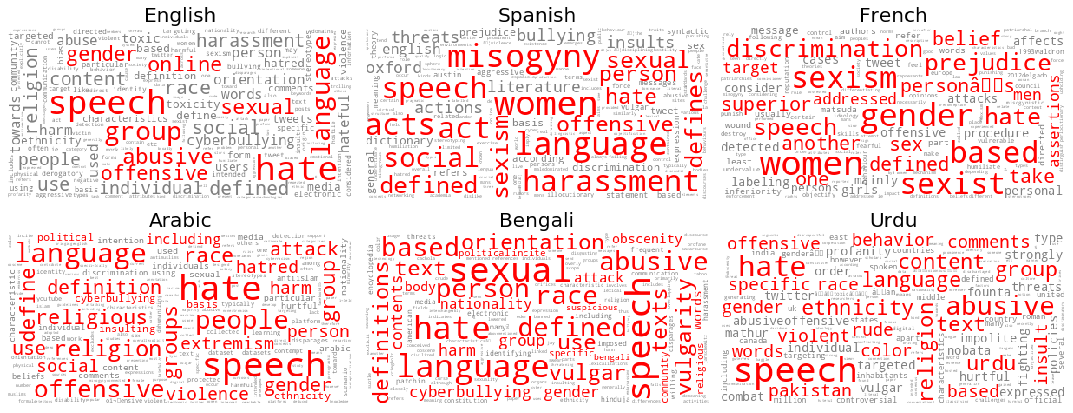

In [45]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 6))
for n, lang in enumerate(['English', 'Spanish', 'French', 'Arabic', 'Bengali', 'Urdu']):
    i = n // 3
    j = n % 3
    # print(i, j)
    lang_data = data[data['Language'] == lang]['Construct definition']
    # print(lang)
    wordcloud = get_wordcloud_colored(' '.join(lang_data.values), name = lang)
    ax[i][j].imshow(wordcloud)
    ax[i][j].axis('off')
    ax[i][j].set_title(lang, fontsize = 20)
    
plt.tight_layout()
# plt.savefig('../results/construct_def.pdf', dpi = 400)

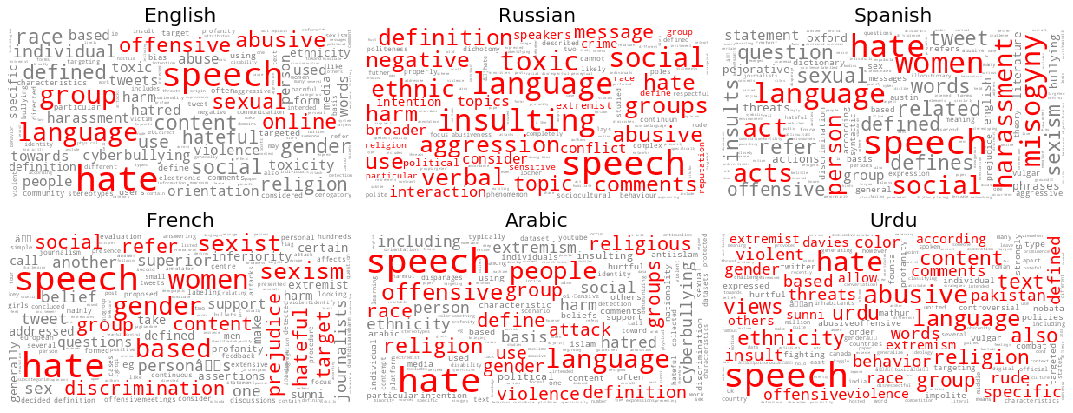

In [46]:
languages_of_interest = ['English', 'Russian', 'Spanish', 'French', 'Arabic', 'Urdu']

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 6))
for n, lang in enumerate(languages_of_interest):
    i = n // 3
    j = n % 3
    # print(i, j)
    lang_data = data_lang_df[data_lang_df['Language updated'] == lang]['Construct definition']
    # print(lang)
    wordcloud = get_wordcloud_colored(' '.join(lang_data.values), name = lang)
    ax[i][j].imshow(wordcloud)
    ax[i][j].axis('off')
    ax[i][j].set_title(lang, fontsize = 20)
    
plt.tight_layout()
# plt.savefig('../results/construct_def.pdf', dpi = 400)

### TF-IDF word clouds

In [47]:
from nltk import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string

from string import digits
import re

remove_digits = str.maketrans('', '', digits)
stops = stopwords.words('english')
lemma = nltk.wordnet.WordNetLemmatizer()

def find_keywords(main_datas, textfield = "whole_review_text",
                  n_gram_range = range(4)):
    # step 1: find keywords
    goal_keywords = []
    documents = []
    if sent_based:
        textfield_ = textfield + "_sent"

    # basic preprocessing --- a) lower case, b) remove punctuaction
    for num in range(num_goals):
        dataset = main_datas[textfield][sim_num][num].copy()
        dataset = dataset.dropna(subset = [textfield_], axis = 0)
        #print(len(dataset))
        doc = ' '.join(dataset[textfield].values).lower().translate(string.punctuation).translate(remove_digits)
        doc = re.sub(r'[^\w\s]','',doc).replace('_', '')
        split_doc = [lemma.lemmatize(i, pos="v") for i in doc.split() if i not in stops]
        documents.append(' '.join(split_doc)  )
        
        keywords = []    
        if not fulltext:
            for n in n_gram_range:
                ngram_counts = Counter(ngrams(split_doc, n)).most_common(100)
                keywords.append([" ".join(list(i)) for (i,j) in ngram_counts])
            goal_keywords.append(keywords)          
    
    if fulltext:
        megadoc = [i.split(" ") for i in documents]
        megadoc = [item for sublist in megadoc for item in sublist]
        for n in n_gram_range:
            ngram_counts = Counter(ngrams(megadoc, n)).most_common(100)
            #print(n, ngram_counts[:5])
            keywords.append([" ".join(list(i)) for (i,j) in ngram_counts])
        goal_keywords.append(keywords)
    return goal_keywords, documents

In [48]:
documents = []

for lang in top_languages:
    lang_data = list(data_lang_df[data_lang_df['Language updated'] == lang]['Construct definition'].values)
    text = ' '.join(lang_data)
    text = text.translate(str.maketrans('', '', string.punctuation))
    processed_text = [i.lower() for i in text.split(' ') if not i.isdigit()]
    relevant_texts = [i for i in processed_text if i not in StopWords]
    documents.append(' '.join(relevant_texts))

In [49]:
len(documents)

15

In [50]:
import nltk
from nltk.tokenize import TweetTokenizer

# create a function for the tweet tokenizer from NLTK
def tok(text):
    tt = TweetTokenizer()
    # return tt.tokenize(text)
    return nltk.word_tokenize(text)

n_gram_range = range(1, 4)
vect = TfidfVectorizer(tokenizer=tok, smooth_idf=False)

In [51]:
tfidf_matrix = vect.fit_transform(documents)
tfidf_scores = pd.DataFrame(tfidf_matrix.toarray(), columns = vect.get_feature_names())
features = vect.get_feature_names()

In [52]:
tfidf_scores['Language'] = top_languages
tfidf_score_list = tfidf_scores.set_index('Language').to_dict(orient='records')#.sort_values('English', axis = 1, ascending = False)

text_tfidf_scores = {}
for n, lang in enumerate(top_languages):
    text_tfidf_scores[lang] = tfidf_score_list[n]

In [53]:
tfidf_score = tfidf_scores#.set_index('Language').sort_values('English', axis = 1, ascending = False)

lang = 'French'
tfidf_score = tfidf_score[tfidf_score['Language'] == lang]
tfidf_score = tfidf_score.set_index('Language').sort_values(lang, axis = 1, ascending = False).T.head(100)
tfidf_score = tfidf_score / tfidf_score.sum()
tfidf_score.T.to_dict(orient = 'records')

[{'women': 0.03749534217349729,
  'speech': 0.031036538900029657,
  'hate': 0.031036538900029657,
  'sexist': 0.02592636754938141,
  'sexism': 0.02567838891091362,
  'prejudice': 0.01748329740363368,
  'assertions': 0.016562684283988386,
  'based': 0.016390183014559884,
  'gender': 0.016390183014559884,
  'discrimination': 0.014060753315061484,
  'take': 0.013466615651870474,
  'addressed': 0.013466615651870474,
  'personâ\x80\x99s': 0.013466615651870474,
  'superior': 0.013466615651870474,
  'men': 0.013466615651870474,
  'belief': 0.013466615651870474,
  'refer': 0.01283919445545681,
  'hateful': 0.011806381155876018,
  'target': 0.010911717581451975,
  'a': 0.010370547019752563,
  'â\x80¢': 0.010370547019752563,
  'journalists': 0.010370547019752563,
  'tweet': 0.010370547019752563,
  'group': 0.009549704276932204,
  'sex': 0.009373835543374322,
  'inferiority': 0.009373835543374322,
  'eg': 0.009373835543374322,
  'questions': 0.009373835543374322,
  'â\x80\x93': 0.0093738355433743

In [54]:
def my_tf_color_func(dictionary):
    def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
        if dictionary[word] > 0.1:
            return 'red'
        else:
            return 'grey'
    return my_tf_color_func_inner

def get_tfidf_wordcloud(text_dict, name = 'with_target'):
    # Generate a word cloud image
    wordcloud = WordCloud(color_func=my_tf_color_func(text_dict), max_font_size=40,
                          background_color="white").generate_from_frequencies(text_dict)

#     plt.savefig('../results/%s_wc.pdf' %name)
#     with open('../results/%s_wc.svg' %name, "w") as text_file:
#         text_file.write(wordcloud.to_svg())
    # plt.show()
    return wordcloud

def get_tfidf_df_wordcloud(tfidf_scores, name = 'with_target'):
    # Generate a word cloud image
    tfidf_score = tfidf_scores[tfidf_scores['Language'] == name]
    tfidf_score = tfidf_score.set_index('Language').sort_values(name, axis = 1, ascending = False).T.head(100)
    tfidf_score / tfidf_score.sum()
    text_dict = tfidf_score.T.to_dict(orient = 'records')[0]
    # print(text_dict)
    wordcloud = WordCloud(color_func=my_tf_color_func(text_dict), max_font_size=40,
                          background_color="white").generate_from_frequencies(text_dict)

#     plt.savefig('../results/%s_wc.pdf' %name)
#     with open('../results/%s_wc.svg' %name, "w") as text_file:
#         text_file.write(wordcloud.to_svg())
    # plt.show()
    return wordcloud

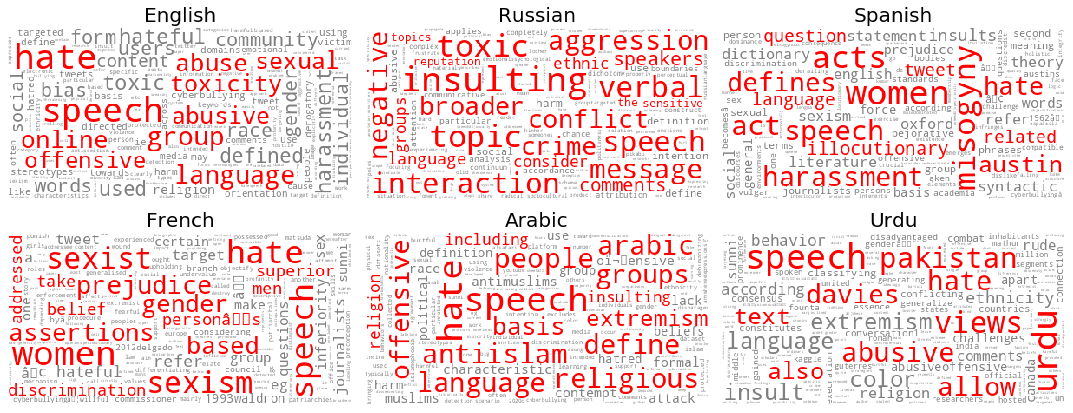

In [55]:
languages_of_interest = ['English', 'Russian', 'Spanish', 'French', 'Arabic', 'Urdu']

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 6))
for n, lang in enumerate(languages_of_interest):
    i = n // 3
    j = n % 3
    wordcloud = get_tfidf_wordcloud(text_tfidf_scores[lang], name = lang)
    ax[i][j].imshow(wordcloud)
    ax[i][j].axis('off')
    ax[i][j].set_title(lang, fontsize = 20)
    
plt.tight_layout()
# plt.savefig('../results/construct_def_tfidf.pdf', dpi = 400)

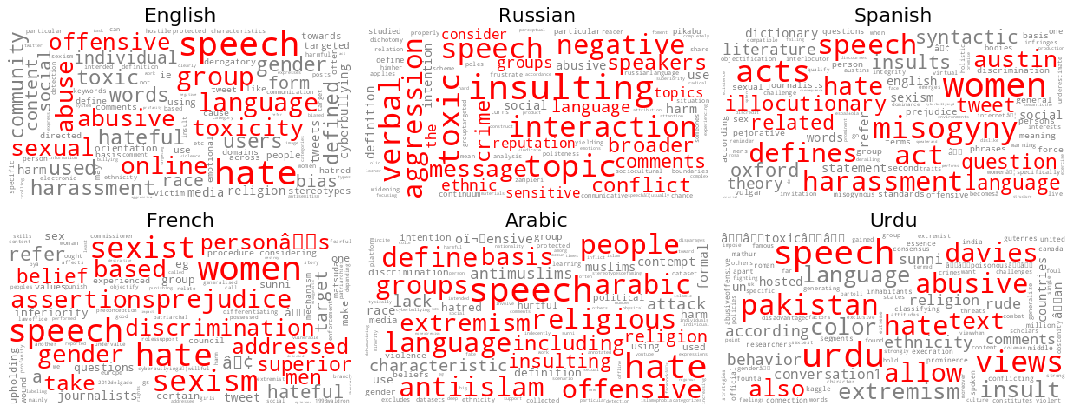

In [56]:
languages_of_interest = ['English', 'Russian', 'Spanish', 'French', 'Arabic', 'Urdu']

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 6))
for n, lang in enumerate(languages_of_interest):
    i = n // 3
    j = n % 3
    wordcloud = get_tfidf_df_wordcloud(tfidf_scores, name = lang)
    ax[i][j].imshow(wordcloud)
    ax[i][j].axis('off')
    ax[i][j].set_title(lang, fontsize = 20)
    
plt.tight_layout()
# plt.savefig('../results/construct_def_tfidf.pdf', dpi = 400)

instead of clubbing all definitions of a language into one document, have each definition correspond to a separate document and then sum them to find the most frequent terms by language.

In [57]:
documents_by_language = {}
documents = []
languages = []

for lang in top_languages:
    documents_by_language[lang] = []
    lang_data = list(data_lang_df[data_lang_df['Language updated'] == lang]['Construct definition'].values)
    for text in lang_data:
        text = text.translate(str.maketrans('', '', string.punctuation))
        processed_text = [i.lower() for i in text.split(' ') if not i.isdigit()]
        relevant_texts = [i for i in processed_text if i not in StopWords]
        documents_by_language[lang].append(' '.join(relevant_texts))
        documents.append(' '.join(relevant_texts))
        languages.append(lang)

In [58]:
len(documents)

350

In [59]:
vect = TfidfVectorizer(tokenizer=tok)
tfidf_matrix = vect.fit_transform(documents)
tfidf_scores = pd.DataFrame(tfidf_matrix.toarray(), columns = vect.get_feature_names())
features = vect.get_feature_names()
tfidf_scores['Language'] = languages
# tfidf_score_list = tfidf_scores.set_index('Language').to_dict(orient='records')#.sort_values('English', axis = 1, ascending = False)

# text_tfidf_scores = {}
# for n, lang in enumerate(top_languages):
#     text_tfidf_scores[lang] = tfidf_score_list[n]

In [60]:
tfidf_scores

1   10   11  1962â¦  1993waldron  1994    2  2003  2012delgado  2018b  \
0    0.0  0.0  0.0      0.0          0.0   0.0  0.0   0.0          0.0    0.0   
1    0.0  0.0  0.0      0.0          0.0   0.0  0.0   0.0          0.0    0.0   
2    0.0  0.0  0.0      0.0          0.0   0.0  0.0   0.0          0.0    0.0   
3    0.0  0.0  0.0      0.0          0.0   0.0  0.0   0.0          0.0    0.0   
4    0.0  0.0  0.0      0.0          0.0   0.0  0.0   0.0          0.0    0.0   
..   ...  ...  ...      ...          ...   ...  ...   ...          ...    ...   
345  0.0  0.0  0.0      0.0          0.0   0.0  0.0   0.0          0.0    0.0   
346  0.0  0.0  0.0      0.0          0.0   0.0  0.0   0.0          0.0    0.0   
347  0.0  0.0  0.0      0.0          0.0   0.0  0.0   0.0          0.0    0.0   
348  0.0  0.0  0.0      0.0          0.0   0.0  0.0   0.0          0.0    0.0   
349  0.0  0.0  0.0      0.0          0.0   0.0  0.0   0.0          0.0    0.0   

     ...  â¦these  â¦violating  â¦violence     â¦we  â¦âsemiotic  \
0    ...       0.0           0.0          0.0  0.000000             0.0   
1    ...       0.0           0.0          0.0  0.000000             0.0   
2    ...       0.0           0.0          0.0  0.000000             0.0   
3    ...       0.0           0.0          0.0  0.000000             0.0   
4    ...       0.0           0.0          0.0  0.000000             0.0   
..   ...       ...           ...          ...       ...             ...   
345  ...       0.0           0.0          0.0  0.000000             0.0   
346  ...       0.0           0.0          0.0  0.000000             0.0   
347  ...       0.0           0.0          0.0  0.115455             0.0   
348  ...       0.0           0.0          0.0  0.000000             0.0   
349  ...       0.0           0.0          0.0  0.000000             0.0   

     â¦âtoxicâ  â¥  ï¬eld  ï¬rst  Language  
0               0.0  0.0     0.0     0.0   English  
1               0.0  0.0     0.0     0.0   English  
2               0.0  0.0     0.0     0.0   English  
3               0.0  0.0     0.0     0.0   English  
4               0.0  0.0     0.0     0.0   English  
..              ...  ...     ...     ...       ...  
345             0.0  0.0     0.0     0.0     Dutch  
346             0.0  0.0     0.0     0.0     Dutch  
347             0.0  0.0     0.0     0.0     Dutch  
348             0.0  0.0     0.0     0.0     Dutch  
349             0.0  0.0     0.0     0.0     Dutch  

[350 rows x 2443 columns]

In [61]:
lang = 'English'
tfidf_score = tfidf_scores[tfidf_scores['Language'] == lang]
# tfidf_score = tfidf_score.set_index('Language').sort_values(lang, axis = 1, ascending = False).T.head(100)
# tfidf_score = tfidf_score / tfidf_score.sum()
# tfidf_score.T.to_dict(orient = 'records')
tfidf_score.set_index('Language').sum().sort_values(ascending = False) / len(tfidf_score)

hate           0.065127
speech         0.064786
language       0.041872
abusive        0.035900
online         0.033917
                 ...   
someones       0.000000
consequence    0.000000
consensus      0.000000
fearful        0.000000
detractive     0.000000
Length: 2442, dtype: float64

This has the same problem, i.e., speech is given a high score. Apparently this is due to sklearn's implementation of TF-IDF: 
- https://stackoverflow.com/questions/70557002/why-does-sklearn-tf-idf-vectorizer-give-the-highest-scores-to-stopwords
- https://stackoverflow.com/questions/70727739/tfidfvectorizer-seems-to-be-giving-incorrect-results/70733642#70733642

### custom tf-idf

In [62]:
documents = []

for lang in top_languages:
    lang_data = list(data_lang_df[data_lang_df['Language updated'] == lang]['Construct definition'].values)
    text = ' '.join(lang_data)
    text = text.translate(str.maketrans('', '', string.punctuation))
    processed_text = [i.lower() for i in text.split(' ') if not i.isdigit()]
    relevant_texts = [i for i in processed_text if i not in StopWords]
    # remove rare words
    # relevant_texts = [i for i in dict(Counter(relevant_texts)) if dict(Counter(relevant_texts))[i] > 2]
    documents.append(' '.join(relevant_texts))

In [63]:
import math
from nltk.tokenize import word_tokenize

def tf(term, doc):
    terms = [term.lower() for term in word_tokenize(doc)]
    return terms.count(term) / len(terms)

def dft(term, corpus):
    return sum(1 for doc in corpus if term in [term.lower() for term in word_tokenize(doc)])

def idf(term, corpus):
    return math.log(len(corpus) /  dft(term, corpus))

def tfidf(term, doc, corpus):
    return tf(term, doc) * idf(term, corpus)

language_dfs = {}
for i, doc in enumerate(documents):
    scores = {term.lower(): tfidf(term.lower(), doc, documents) for term in word_tokenize(doc) if term.isalpha()} 
    sorted_terms = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    df_top_feats = pd.DataFrame()
    idx = 0
    for term, score in sorted_terms:
        df_top_feats.loc[idx, 'feature'] = term
        df_top_feats.loc[idx, 'tfidf'] = round(score, 5)
        idx+=1
    print(top_languages[i], df_top_feats.head(10), '\n')
    language_dfs[top_languages[i]] = df_top_feats

English       feature    tfidf
0       abuse  0.00855
1    toxicity  0.00720
2   community  0.00540
3       toxic  0.00502
4        bias  0.00495
5      online  0.00477
6       users  0.00467
7        used  0.00441
8  harassment  0.00430
9     domains  0.00423 

Arabic        feature    tfidf
0       arabic  0.01352
1    antiislam  0.01352
2       define  0.00915
3    religious  0.00915
4     contempt  0.00901
5         lack  0.00901
6       formal  0.00901
7  antimuslims  0.00901
8      muslims  0.00901
9    extremism  0.00880 

Bengali        feature    tfidf
0    vulgarity  0.02628
1         body  0.02355
2   suspicious  0.02355
3      bengali  0.02355
4        texts  0.02099
5     contents  0.01752
6    obscenity  0.01752
7    community  0.01752
8  definitions  0.01724
9       sexual  0.01333 

Spanish          feature    tfidf
0          women  0.01944
1           acts  0.01780
2       misogyny  0.01458
3        defines  0.01337
4            act  0.01215
5         austin  0.01198


In [64]:
for lang in top_languages:
    print(lang, language_dfs[lang].head(100).mean()[0])

English 0.0029758000000000002
Arabic 0.0055983000000000005
Bengali 0.010587800000000001
Spanish 0.0067578000000000004
Hindi-English 0.007682900000000001
French 0.007247699999999997
Russian 0.009902199999999998
Urdu 0.0094303
Indonesian 0.010103999999999997
German 0.008548499999999997
Italian 0.011271958762886598
Chinese 0.0095982
Portuguese 0.0109257
Turkish 0.01734117647058824
Dutch 0.014173437500000002


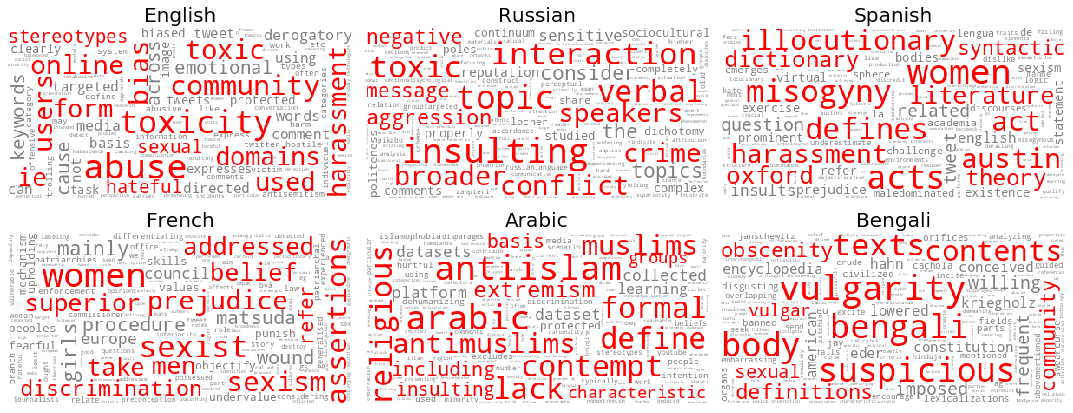

In [65]:
def my_tf_color_func(dictionary, threshold = 0.1):
    def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
        if dictionary[word] > threshold:
            return 'red'
        else:
            return 'grey'
    return my_tf_color_func_inner

def get_tfidf_wordcloud(text_dict, name = 'with_target', threshold = 0.1):
    # Generate a word cloud image
    wordcloud = WordCloud(color_func=my_tf_color_func(text_dict, threshold), max_font_size=40,
                          background_color="white").generate_from_frequencies(text_dict)

#     plt.savefig('../results/%s_wc.pdf' %name)
#     with open('../results/%s_wc.svg' %name, "w") as text_file:
#         text_file.write(wordcloud.to_svg())
    # plt.show()
    return wordcloud

languages_of_interest = ['English', 'Russian', 'Spanish', 'French', 'Arabic', 'Bengali']

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 6))
for n, lang in enumerate(languages_of_interest):
    i = n // 3
    j = n % 3
    text_dict = language_dfs[lang].set_index('feature').to_dict()['tfidf']
    threshold = language_dfs[lang].head(30).median()[0]
    wordcloud = get_tfidf_wordcloud(text_dict, name = lang, threshold = threshold)
    ax[i][j].imshow(wordcloud)
    ax[i][j].axis('off')
    ax[i][j].set_title(lang, fontsize = 20)
    
plt.tight_layout()
# plt.savefig('../results/construct_def_tfidf.pdf', dpi = 400)

English 0.003695 1681
Arabic 0.00716 346
Bengali 0.01177 165
Hindi-English 0.00884 246
Spanish 0.00877 315
French 0.00756 255
Russian 0.01171 208
Urdu 0.01054 190
Indonesian 0.01248 152


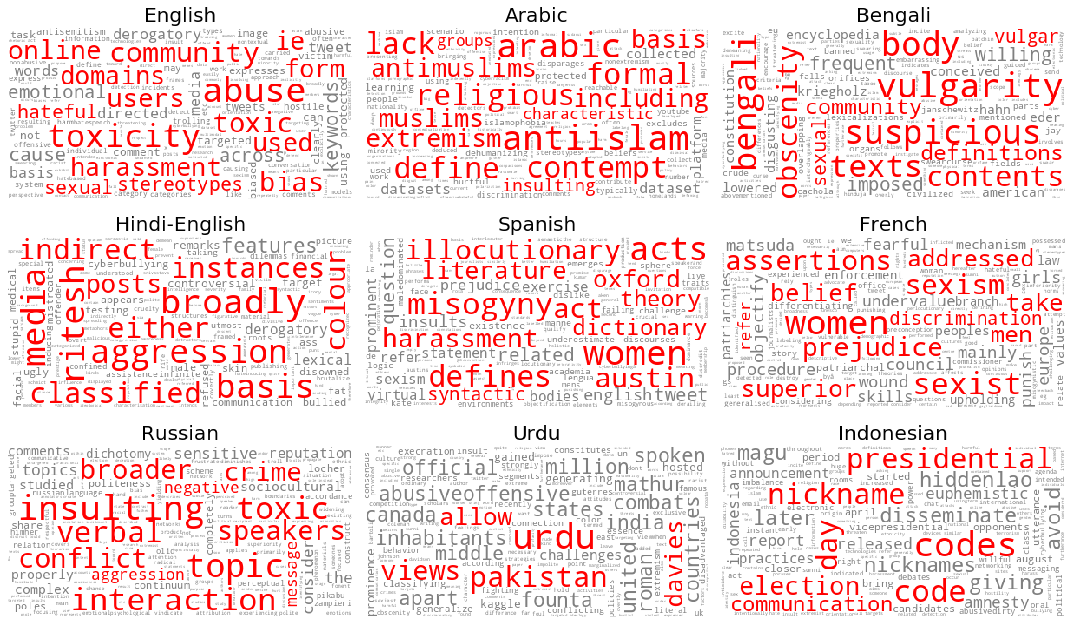

In [66]:
languages_of_interest = ['English', 'Arabic', 'Bengali', 'Hindi-English',
                         'Spanish', 'French', 'Russian', 'Urdu',
                         'Indonesian']

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 9))
for n, lang in enumerate(languages_of_interest):
    i = n // 3
    j = n % 3
    text_dict = language_dfs[lang].set_index('feature').to_dict()['tfidf']
    threshold = language_dfs[lang].head(30).median()[0]
    print(lang, threshold, len(language_dfs[lang]))
    wordcloud = get_tfidf_wordcloud(text_dict, name = lang, threshold = threshold)
    ax[i][j].imshow(wordcloud)
    ax[i][j].axis('off')
    ax[i][j].set_title(lang, fontsize = 20)
    
plt.tight_layout()
# plt.savefig('../results/construct_def_tfidf.pdf', dpi = 400)

English 0.003695 1681
Arabic 0.00716 346
Bengali 0.01177 165
Hindi-English 0.00884 246
Spanish 0.00877 315
French 0.00756 255
Russian 0.01171 208
Urdu 0.01054 190
Indonesian 0.01248 152


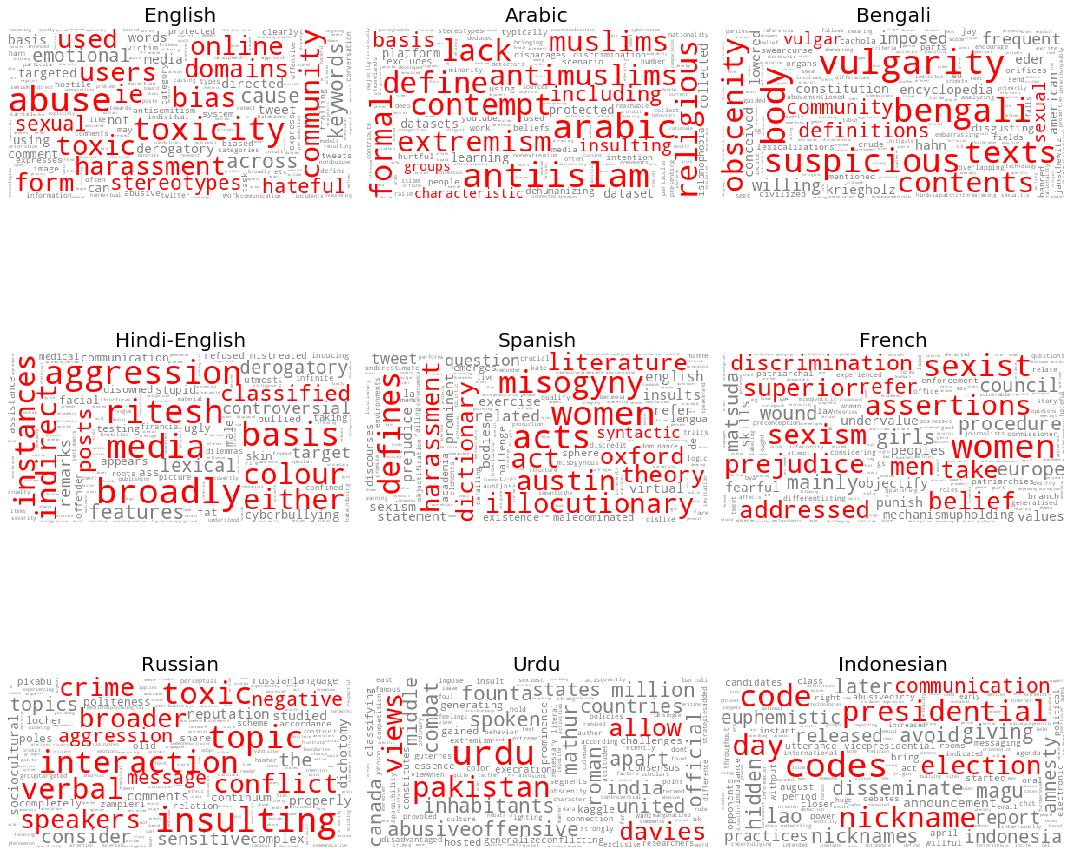

In [67]:
languages_of_interest = ['English', 'Arabic', 'Bengali', 'Hindi-English',
                         'Spanish', 'French', 'Russian', 'Urdu',
                         'Indonesian']

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
for n, lang in enumerate(languages_of_interest):
    i = n // 3
    j = n % 3
    text_dict = language_dfs[lang].set_index('feature').to_dict()['tfidf']
    threshold = language_dfs[lang].head(30).median()[0]
    print(lang, threshold, len(language_dfs[lang]))
    wordcloud = get_tfidf_wordcloud(text_dict, name = lang, threshold = threshold)
    ax[i][j].imshow(wordcloud)
    ax[i][j].axis('off')
    ax[i][j].set_title(lang, fontsize = 20)
    
plt.tight_layout()
# plt.savefig('../results/construct_def_tfidf.pdf', dpi = 400)

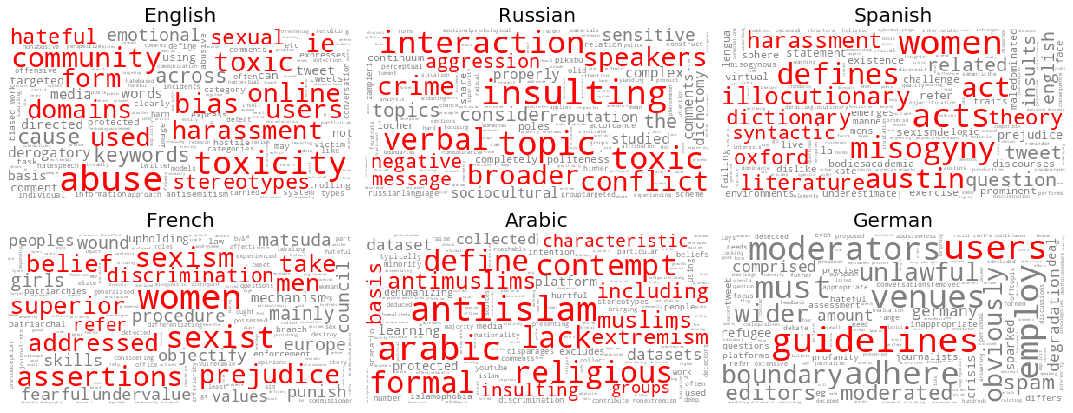

In [68]:
languages_of_interest = ['English', 'Russian', 'Spanish', 'French', 'Arabic', 'German']

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 6))
for n, lang in enumerate(languages_of_interest):
    i = n // 3
    j = n % 3
    text_dict = language_dfs[lang].set_index('feature').to_dict()['tfidf']
    threshold = language_dfs[lang].head(30).median()[0]
    wordcloud = get_tfidf_wordcloud(text_dict, name = lang, threshold = threshold)
    ax[i][j].imshow(wordcloud)
    ax[i][j].axis('off')
    ax[i][j].set_title(lang, fontsize = 20)
    
plt.tight_layout()

## Jessica review

In [69]:
data = pd.read_excel('../data/CodingComplete.xlsx',
                     sheet_name='CODING', engine='openpyxl')

In [70]:
data.columns

Index(['ID', 'Authors', 'Title', 'Year', 'Journal', 'DOI', 'TARGETED',
       'Survey Data', 'Register Data', 'Text Data', 'Video Data',
       'Images Data', 'Sensor Data', 'Web Tracking Data', 'Social Media Data',
       'Else', 'DATATYPE', 'Perspective?', 'Else.1', 'PERSPECTIVE',
       'Data Attributes', 'Base Framework?', 'Granularity?', 'GRANULARITY',
       'Casestudy?', 'Name?', 'Visualization?', 'REPR Open Text',
       'REPR COVERAGE', 'Name?.1', 'REPR SAMPLING', 'Name?.2', 'REPR NONRESP',
       'Name?.3', 'Else.2', 'DUMMY_REPR', 'TYPE_REPR', 'MEAS Open Text',
       'MEAS CONTENT VALIDITY', 'Name?.4', 'MEAS RESPONSE', 'Name?.5',
       'MEAS PLATFORM', 'Name?.6', 'MEAS PROCESSING', 'Name?.7', 'Else.3',
       'DUMMY_MEAS', 'TYPE_MEAS', 'MOD Open Text', 'MOD MODELLING', 'Name?.8',
       'Else.4', 'DUMMY_MOD', 'TYPE_MOD', 'ERROR Open Text', 'Coder'],
      dtype='object')

steps:

- remove 99s
- preprocess?
- make word clouds

In [71]:
data['Errors of Representation'] = data['REPR Open Text']
data['Errors of Measurement'] = data['MEAS Open Text']
data['Other Errors'] = data['MOD Open Text']

broad_cols_of_interest = ['Errors of Representation',
       'Errors of Measurement',
       'Other Errors']

In [72]:
StopWords.append('error')
StopWords.append('errors')
StopWords.append('data')

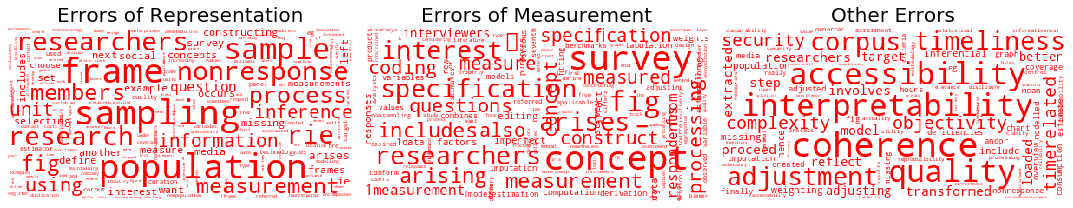

In [73]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 3))

for n, col in enumerate(broad_cols_of_interest):
    text_data = data[data[col] != 99]
    text_data = [k for k in text_data.dropna(subset = [col])[col].values[1:] if type(k) == str]
    # print(col)
    
    # wordcloud = WordCloud(max_font_size=40, background_color="white").generate(' '.join(text_data))
    wordcloud = get_wordcloud_colored(' '.join(text_data), name =col)

    ax[n].imshow(wordcloud)
    ax[n].axis('off')
    ax[n].set_title(col, fontsize = 20)
    
plt.tight_layout()

In [74]:
data['Coverage'] = data['Name?.1']
data['Sampling'] = data['Name?.2']
data['Non-response'] = data['Name?.3']
data['Validity'] = data['Name?.4']
data['Response'] = data['Name?.5']
data['Platform'] = data['Name?.6']
data['Processing'] = data['Name?.7']
data['Modelling'] = data['Name?.8']

specific_cols_of_interest = ['Coverage', 'Sampling', 'Non-response', 'Validity', 'Response',
       'Platform', 'Processing', 'Modelling']

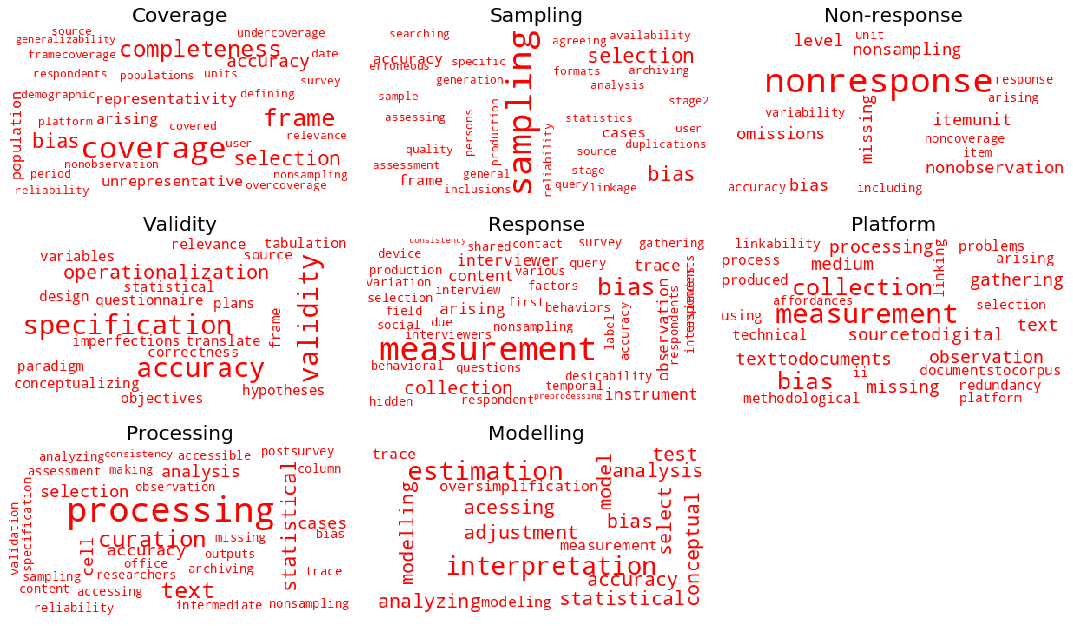

In [75]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 9))

for n, col in enumerate(specific_cols_of_interest):
    i = n // 3
    j = n % 3
    
    text_data = data[data[col] != 99]
    text_data = [k for k in text_data.dropna(subset = [col])[col].values[1:] if type(k) == str]
    # print(col)
    
    # wordcloud = WordCloud(max_font_size=40, background_color="white").generate(' '.join(text_data))
    wordcloud = get_wordcloud_colored(' '.join(text_data), name =col)

    ax[i][j].imshow(wordcloud)
    ax[i][j].axis('off')
    ax[i][j].set_title(col, fontsize = 20)
    
fig.delaxes(ax[2][2])
plt.tight_layout()

In [76]:
source_documents = []

for col in broad_cols_of_interest:
    text_data = data[data[col] != 99]
    text_data = [k for k in text_data.dropna(subset = [col])[col].values[1:] if type(k) == str]
    text = ' '.join(text_data)
    text = text.translate(str.maketrans('', '', string.punctuation))
    processed_text = [i.lower() for i in text.split(' ') if not i.isdigit()]
    relevant_texts = [i for i in processed_text if i not in StopWords]
    # remove rare words
    # relevant_texts = [i for i in dict(Counter(relevant_texts)) if dict(Counter(relevant_texts))[i] > 2]
    source_documents.append(' '.join(relevant_texts))

tfidf_matrix = vect.fit_transform(source_documents)
tfidf_scores = pd.DataFrame(tfidf_matrix.toarray(), columns = vect.get_feature_names())
features = vect.get_feature_names()

tfidf_scores['Error Source'] = broad_cols_of_interest
tfidf_score_list = tfidf_scores.set_index('Error Source').to_dict(orient='records')#.sort_values('English', axis = 1, ascending = False)

text_tfidf_scores = {}
for n, col in enumerate(broad_cols_of_interest):
    text_tfidf_scores[col] = tfidf_score_list[n]
    
tfidf_score = tfidf_scores#.set_index('Language').sort_values('English', axis = 1, ascending = False)

col = broad_cols_of_interest[0]
tfidf_score = tfidf_score[tfidf_score['Error Source'] == col]
tfidf_score = tfidf_score.set_index('Error Source').sort_values(col, axis = 1, ascending = False).T.head(100)
tfidf_score = tfidf_score / tfidf_score.sum()
tfidf_score.T.to_dict(orient = 'records')

[{'sampling': 0.04040790585583949,
  'frame': 0.04040790585583949,
  'sample': 0.030305929391879618,
  'population': 0.02688984719352131,
  'nonresponse': 0.02688984719352131,
  'research': 0.02525494115989968,
  'rie': 0.02525494115989968,
  'members': 0.020203952927919745,
  'unit': 0.020203952927919745,
  'information': 0.020203952927919745,
  'measurement': 0.015365626967726462,
  'and': 0.015365626967726462,
  'used': 0.015152964695939809,
  'using': 0.015152964695939809,
  'item': 0.015152964695939809,
  'inference': 0.015152964695939809,
  'process': 0.014915975084663077,
  'researchers': 0.014915975084663077,
  'fig': 0.011932780067730462,
  'question': 0.011524220225794846,
  'panel': 0.010101976463959873,
  'concepts': 0.010101976463959873,
  'choose': 0.010101976463959873,
  'ie': 0.010101976463959873,
  'social': 0.010101976463959873,
  'set': 0.010101976463959873,
  'occurs': 0.010101976463959873,
  'of': 0.010101976463959873,
  'technologyies': 0.010101976463959873,
  'we

In [77]:
enum = ['a', 'b', 'c']

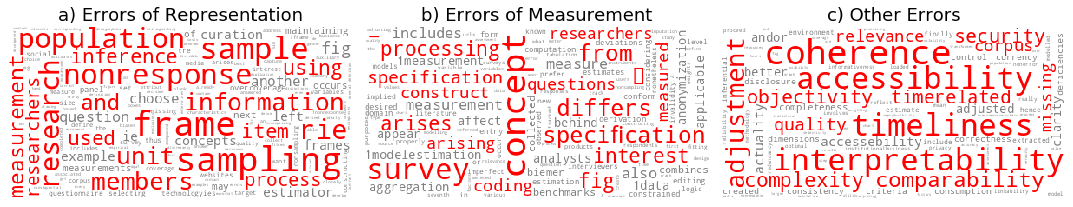

In [78]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 3))

for n, col in enumerate(broad_cols_of_interest):
    text_data = data[data[col] != 99]
    text_data = [k for k in text_data.dropna(subset = [col])[col].values[1:] if type(k) == str]
    # print(col)
    
    # wordcloud = WordCloud(max_font_size=40, background_color="white").generate(' '.join(text_data))
    # wordcloud = get_wordcloud_colored(' '.join(text_data), name =col)
    wordcloud = get_tfidf_wordcloud(text_tfidf_scores[col], name = col)

    ax[n].imshow(wordcloud)
    ax[n].axis('off')
    ax[n].set_title(label = enum[n] + ') ' + col, fontsize = 18)
    
plt.tight_layout()
plt.savefig('../results/jessica_wordclouds_error_source.pdf', dpi = 400)

In [79]:
type_documents = []

for col in specific_cols_of_interest:
    text_data = data[data[col] != 99]
    text_data = [k for k in text_data.dropna(subset = [col])[col].values[1:] if type(k) == str]
    text = ' '.join(text_data)
    text = text.translate(str.maketrans('', '', string.punctuation))
    processed_text = [i.lower() for i in text.split(' ') if not i.isdigit()]
    relevant_texts = [i for i in processed_text if i not in StopWords]
    # remove rare words
    # relevant_texts = [i for i in dict(Counter(relevant_texts)) if dict(Counter(relevant_texts))[i] > 2]
    type_documents.append(' '.join(relevant_texts))

tfidf_matrix = vect.fit_transform(type_documents)
tfidf_scores = pd.DataFrame(tfidf_matrix.toarray(), columns = vect.get_feature_names())
features = vect.get_feature_names()

tfidf_scores['Error Type'] = specific_cols_of_interest
tfidf_score_list = tfidf_scores.set_index('Error Type').to_dict(orient='records')#.sort_values('English', axis = 1, ascending = False)

text_tfidf_scores = {}
for n, col in enumerate(specific_cols_of_interest):
    text_tfidf_scores[col] = tfidf_score_list[n]
    
tfidf_score = tfidf_scores#.set_index('Language').sort_values('English', axis = 1, ascending = False)

col = specific_cols_of_interest[0]
tfidf_score = tfidf_score[tfidf_score['Error Type'] == col]
tfidf_score = tfidf_score.set_index('Error Type').sort_values(col, axis = 1, ascending = False).T.head(100)
tfidf_score = tfidf_score / tfidf_score.sum()
tfidf_score.T.to_dict(orient = 'records')

[{'coverage': 0.1996564739125658,
  'completeness': 0.0998282369562829,
  'frame': 0.08663404939566481,
  'selection': 0.04482452627914363,
  'population': 0.03993129478251315,
  'unrepresentative': 0.03993129478251315,
  'representativity': 0.03993129478251315,
  'bias': 0.03564947629586013,
  'accuracy': 0.026737107221895096,
  'arising': 0.025319655634276152,
  'period': 0.019965647391256575,
  'date': 0.019965647391256575,
  'defining': 0.019965647391256575,
  'demographic': 0.019965647391256575,
  'framecoverage': 0.019965647391256575,
  'generalizability': 0.019965647391256575,
  'overcoverage': 0.019965647391256575,
  'covered': 0.019965647391256575,
  'units': 0.019965647391256575,
  'populations': 0.019965647391256575,
  'undercoverage': 0.019965647391256575,
  'respondents': 0.01673277072843168,
  'relevance': 0.01673277072843168,
  'nonobservation': 0.01673277072843168,
  'user': 0.01673277072843168,
  'survey': 0.01673277072843168,
  'platform': 0.01673277072843168,
  'reli

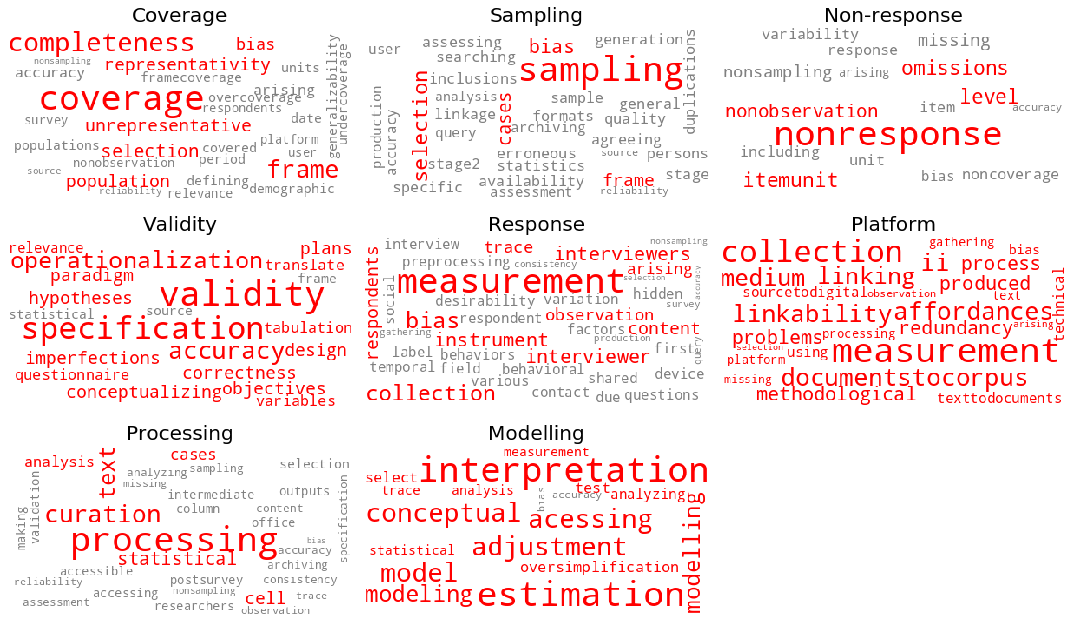

In [80]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 9))

for n, col in enumerate(specific_cols_of_interest):
    i = n // 3
    j = n % 3
    
    text_data = data[data[col] != 99]
    text_data = [k for k in text_data.dropna(subset = [col])[col].values[1:] if type(k) == str]
    # print(col)
    
    # wordcloud = WordCloud(max_font_size=40, background_color="white").generate(' '.join(text_data))
    # wordcloud = get_wordcloud_colored(' '.join(text_data), name =col)
    wordcloud = get_tfidf_wordcloud(text_tfidf_scores[col], name = col)

    ax[i][j].imshow(wordcloud)
    ax[i][j].axis('off')
    ax[i][j].set_title(col, fontsize = 20)
    
fig.delaxes(ax[2][2])
plt.tight_layout()
plt.savefig('../results/jessica_wordclouds_error_type.pdf', dpi = 400)

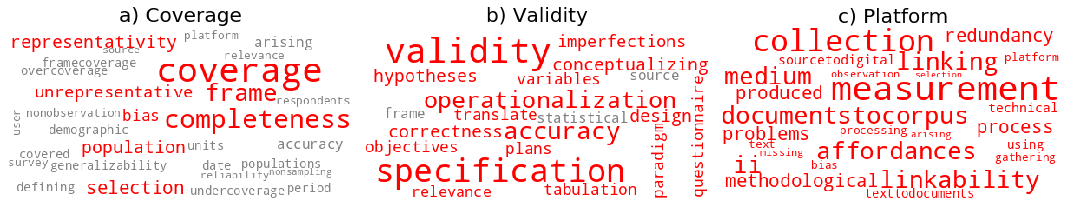

In [81]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 3))

for n, col in enumerate(['Coverage', 'Validity', 'Platform']):
    i = n
    # j = n % 3
    
    text_data = data[data[col] != 99]
    text_data = [k for k in text_data.dropna(subset = [col])[col].values[1:] if type(k) == str]
    # print(col)
    
    # wordcloud = WordCloud(max_font_size=40, background_color="white").generate(' '.join(text_data))
    # wordcloud = get_wordcloud_colored(' '.join(text_data), name =col)
    wordcloud = get_tfidf_wordcloud(text_tfidf_scores[col], name = col)

    ax[i].imshow(wordcloud)
    ax[i].axis('off')
    ax[i].set_title(label = enum[n] + ') ' + col, fontsize = 20)
    
# fig.delaxes(ax[2][2])
plt.tight_layout()
plt.savefig('../results/jessica_wordclouds_error_type__.pdf', dpi = 400)

In [82]:
data_actual = data[1:-1]

In [83]:
data_actual.groupby('DUMMY_REPR').size()

DUMMY_REPR
0.0    26
1.0    32
dtype: int64

In [84]:
data_actual.groupby('DUMMY_MEAS').size()

DUMMY_MEAS
0.0    25
1.0    33
dtype: int64

In [85]:
source_dfs = {}
for i, doc in enumerate(source_documents):
    scores = {term.lower(): tfidf(term.lower(), doc, source_documents) for term in word_tokenize(doc) if term.isalpha()} 
    sorted_terms = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    df_top_feats = pd.DataFrame()
    idx = 0
    for term, score in sorted_terms:
        df_top_feats.loc[idx, 'feature'] = term
        df_top_feats.loc[idx, 'tfidf'] = round(score, 5)
        idx+=1
    print(broad_cols_of_interest[i], df_top_feats.head(10), '\n')
    source_dfs[broad_cols_of_interest[i]] = df_top_feats

Errors of Representation        feature    tfidf
0        frame  0.02283
1     sampling  0.02283
2       sample  0.01712
3     research  0.01427
4          rie  0.01427
5      members  0.01141
6  information  0.01141
7         unit  0.01141
8        using  0.00856
9         item  0.00856 

Errors of Measurement         feature    tfidf
0       concept  0.05425
1          from  0.02034
2  speciﬁcation  0.02034
3       differs  0.02034
4        survey  0.01752
5       arising  0.01356
6     questions  0.01356
7        coding  0.01356
8     construct  0.01356
9      measured  0.01356 

Other Errors             feature    tfidf
0         coherence  0.03995
1        timeliness  0.02996
2     accessibility  0.02996
3  interpretability  0.02996
4        adjustment  0.01997
5     comparability  0.01997
6       objectivity  0.01997
7        complexity  0.01997
8          security  0.01997
9       timerelated  0.01997 



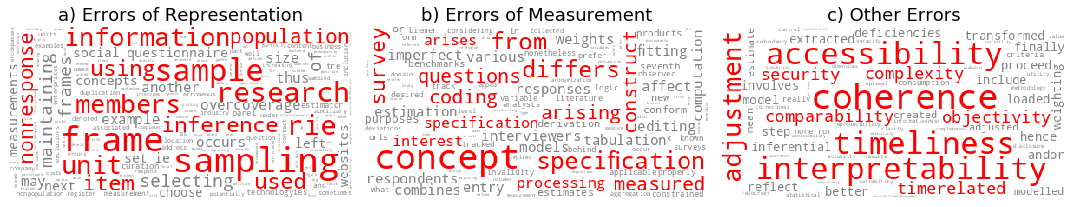

In [86]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 3))

for n, col in enumerate(broad_cols_of_interest):
    text_data = data[data[col] != 99]
    text_data = [k for k in text_data.dropna(subset = [col])[col].values[1:] if type(k) == str]
    # print(col)
    
    # wordcloud = WordCloud(max_font_size=40, background_color="white").generate(' '.join(text_data))
    # wordcloud = get_wordcloud_colored(' '.join(text_data), name =col)
    # wordcloud = get_tfidf_wordcloud(text_tfidf_scores[col], name = col)
    text_dict = source_dfs[col].set_index('feature').to_dict()['tfidf']
    threshold = source_dfs[col].head(30).median()[0]
    wordcloud = get_tfidf_wordcloud(text_dict, name = col, threshold = threshold)

    ax[n].imshow(wordcloud)
    ax[n].axis('off')
    ax[n].set_title(label = enum[n] + ') ' + col, fontsize = 18)
    
plt.tight_layout()
# plt.savefig('../results/jessica_wordclouds_error_source.pdf', dpi = 400)

In [87]:
type_dfs = {}
for i, doc in enumerate(type_documents):
    scores = {term.lower(): tfidf(term.lower(), doc, type_documents) for term in word_tokenize(doc) if term.isalpha()} 
    sorted_terms = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    df_top_feats = pd.DataFrame()
    idx = 0
    for term, score in sorted_terms:
        df_top_feats.loc[idx, 'feature'] = term
        df_top_feats.loc[idx, 'tfidf'] = round(score, 5)
        idx+=1
    print(specific_cols_of_interest[i], df_top_feats.head(10), '\n')
    type_dfs[specific_cols_of_interest[i]] = df_top_feats

Coverage             feature    tfidf
0          coverage  0.34657
1      completeness  0.17329
2             frame  0.09808
3        population  0.06931
4  unrepresentative  0.06931
5  representativity  0.06931
6     framecoverage  0.03466
7       populations  0.03466
8             units  0.03466
9          defining  0.03466 

Sampling       feature    tfidf
0    sampling  0.37808
1       cases  0.05041
2       stage  0.03781
3     linkage  0.03781
4    agreeing  0.03781
5     persons  0.03781
6  generation  0.03781
7  statistics  0.03781
8   assessing  0.03781
9     general  0.03781 

Non-response           feature    tfidf
0     nonresponse  0.80867
1        itemunit  0.11552
2           level  0.11552
3       omissions  0.11552
4  nonobservation  0.07702
5     noncoverage  0.05776
6     variability  0.05776
7        response  0.05776
8       including  0.05776
9            unit  0.05776 

Validity               feature    tfidf
0            validity  0.31507
1       specification  

30 0.04866633333333334
20 0.07793299999999999
26 0.05877076923076923


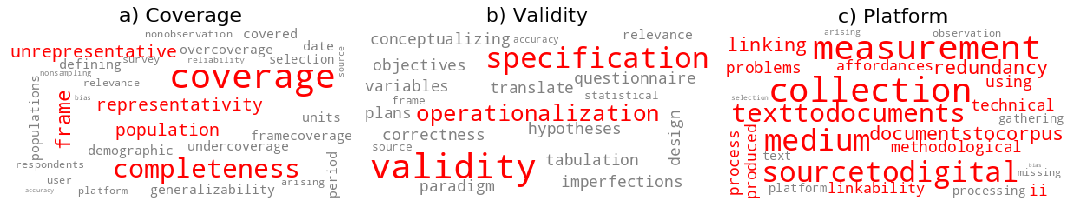

In [88]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 3))

for n, col in enumerate(['Coverage', 'Validity', 'Platform']):
    i = n
    # j = n % 3
    
    text_data = data[data[col] != 99]
    text_data = [k for k in text_data.dropna(subset = [col])[col].values[1:] if type(k) == str]
    # print(col)
    
    # wordcloud = WordCloud(max_font_size=40, background_color="white").generate(' '.join(text_data))
    # wordcloud = get_wordcloud_colored(' '.join(text_data), name =col)
    # wordcloud = get_tfidf_wordcloud(text_tfidf_scores[col], name = col)
    text_dict = type_dfs[col].set_index('feature').to_dict()['tfidf']
    threshold = type_dfs[col].mean()[0]
    print(len(type_dfs[col]), threshold)
    wordcloud = get_tfidf_wordcloud(text_dict, name = col, threshold = threshold)


    ax[i].imshow(wordcloud)
    ax[i].axis('off')
    ax[i].set_title(label = enum[n] + ') ' + col, fontsize = 20)
    
# fig.delaxes(ax[2][2])
plt.tight_layout()
plt.savefig('../results/jessica_wordclouds_error_type__.pdf', dpi = 400)